# Engineering Math
Session 1
Interactive notebook (Python 3)  
Author: 

## 🔧 Setup
Install required packages once:
```bash
pip install numpy matplotlib
```

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 (only for 3-D)

%matplotlib inline

## 1️⃣ Row Picture – Intersection of Lines

Solve the system:
$$
\begin{cases}
2x - y = 0 \\
-x + 2y = 3
\end{cases}
$$

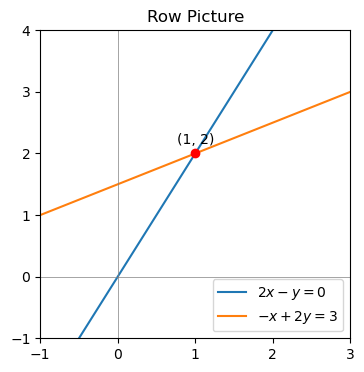

In [3]:
x = np.linspace(-1, 3, 400)
y1 = 2 * x                    # 2x - y = 0  ⇒ y = 2x
y2 = (3 + x) / 2              # -x + 2y = 3 ⇒ y = (3 + x)/2

plt.figure(figsize=(4,4))
plt.plot(x, y1, label=r'$2x - y = 0$')
plt.plot(x, y2, label=r'$-x + 2y = 3$')
plt.scatter([1], [2], color='red', zorder=5)
plt.text(1, 2.15, '(1, 2)', ha='center')
plt.axhline(0, color='grey', lw=0.5)
plt.axvline(0, color='grey', lw=0.5)
plt.xlim(-1, 3)
plt.ylim(-1, 4)
plt.legend()
plt.title('Row Picture')
plt.show()

## 2️⃣ Column Picture – Linear Combination of Vectors

Rewrite as:
$$
x \begin{bmatrix}2 \\ -1\end{bmatrix} + y \begin{bmatrix}-1 \\ 2\end{bmatrix} = \begin{bmatrix}0 \\ 3\end{bmatrix}
$$

In [10]:
col1 = np.array([2, -1])
col2 = np.array([-1, 2])
b    = np.array([0, 3])

# Solve for x, y
A = np.column_stack((col1, col2))
x, y = np.linalg.solve(A, b)
print(f"x = {x}, y = {y}")

# Verify
assert np.allclose(x * col1 + y * col2, b)
print("Linear combination equals b ✔")

x = 1.0, y = 2.0
Linear combination equals b ✔


### 🎯 Visualize the vectors

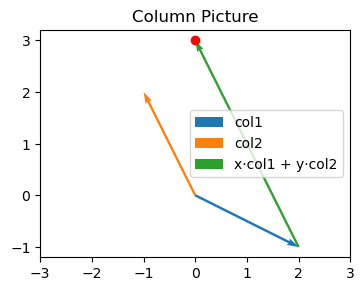

In [8]:
origin = np.zeros(2)
fig, ax = plt.subplots(figsize=(4,4))
ax.quiver(*origin, *col1, scale=1, scale_units='xy', angles='xy', color='C0', label='col1')
ax.quiver(*origin, *col2, scale=1, scale_units='xy', angles='xy', color='C1', label='col2')
ax.quiver(*origin, *(x*col1), scale=1, scale_units='xy', angles='xy', color='C0', alpha=0.3)
ax.quiver(*(x*col1), *(y*col2), scale=1, scale_units='xy', angles='xy', color='C2', label='x·col1 + y·col2')
ax.scatter(*b, color='red', zorder=5)
ax.set_aspect('equal')
ax.set_xlim(-3, 3)   # 关键：限定 x 范围
ax.legend()
ax.set_title('Column Picture')
plt.show()

## 3️⃣ Matrix Picture – A · x = b

### Matrix Equation

<div>$$A\mathbf{x} = \mathbf{b}$$</div>

where  
<div>
$$
A = \begin{bmatrix}
2 & -1 \\
-1 & 2
\end{bmatrix},\quad
\mathbf{x} = \begin{bmatrix}
x \\[4pt]
y
\end{bmatrix},\quad
\mathbf{b} = \begin{bmatrix}
0 \\[4pt]
3
\end{bmatrix}
$$
</div>

i.e.  
<div>
$$
\begin{bmatrix}
2 & -1 \\
-1 & 2
\end{bmatrix}
\begin{bmatrix}
x \\[4pt]
y
\end{bmatrix}
=
\begin{bmatrix}
0 \\[4pt]
3
\end{bmatrix}
$$
</div>

solved by Python  
<div>
$$
\mathbf{x} = A^{-1}\mathbf{b} =
\begin{bmatrix}
1 \\[4pt]
2
\end{bmatrix}
$$
</div>

check the solution  
<div>
$$
A\mathbf{x} =
\begin{bmatrix}
2 & -1 \\
-1 & 2
\end{bmatrix}
\begin{bmatrix}
1 \\[4pt]
2
\end{bmatrix}
=
\begin{bmatrix}
2\cdot1 + (-1)\cdot2 \\[4pt]
-1\cdot1 + 2\cdot2
\end{bmatrix}
=
\begin{bmatrix}
0 \\[4pt]
3
\end{bmatrix}
= \mathbf{b}
$$
</div>

In [12]:
A = np.array([[2, -1],
              [-1, 2]])
b = np.array([0, 3])

x_vec = np.linalg.solve(A, b)
print("Solution vector x =", x_vec)

# Sanity check
print("A @ x =", A @ x_vec)
print("b      =", b)
assert np.allclose(A @ x_vec, b)

Solution vector x = [1. 2.]
A @ x = [0. 3.]
b      = [0 3]


## 4️⃣ Determinant & Linear Independence

In [13]:
det_A = np.linalg.det(A)
print("det(A) =", det_A)

if abs(det_A) < 1e-12:
    print("Matrix is singular → columns are linearly dependent")
else:
    print("Matrix is non-singular → columns are independent")

det(A) = 2.9999999999999996
Matrix is non-singular → columns are independent


## 5️⃣ 3-D Extension (Optional Playground)

Add a third equation:
$$
\begin{cases}
2x - y + 0z = 0 \\
-x + 2y + 0z = 3 \\
0x + 0y + 1z = 5
\end{cases}
$$

In [15]:
A3 = np.array([[2, -1, 0],
               [-1, 2, 0],
               [0, 0, 1]])
b3 = np.array([0, 3, 5])

x3 = np.linalg.solve(A3, b3)
print("3-D solution x, y, z =", x3)

3-D solution x, y, z = [1. 2. 5.]


## 🎁 Quick Cheat-Sheet

| What | Python One-liner |
|------|------------------|
| Solve Ax = b | `np.linalg.solve(A, b)` |
| Determinant | `np.linalg.det(A)` |
| Column check | `np.allclose(A @ x, b)` |
| Plot lines | `plt.plot(x, y)` |
